In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks/complete Dataset (2).zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
root = '/tmp/complete Dataset'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['/tmp/complete Dataset/Damaged', '/tmp/complete Dataset/Intact']


In [ ]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [ ]:
random.seed(103)
random.shuffle(data)

In [ ]:
categories

['/tmp/complete Dataset/Damaged', '/tmp/complete Dataset/Intact']

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

from keras.utils import np_utils

# convert labels to one-hot vectors
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(1869, 2)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 12454 images from 2 categories
train / validation / test split: 8717, 1868, 1869
training data shape:  (8717, 224, 224, 3)
training labels shape:  (8717, 2)


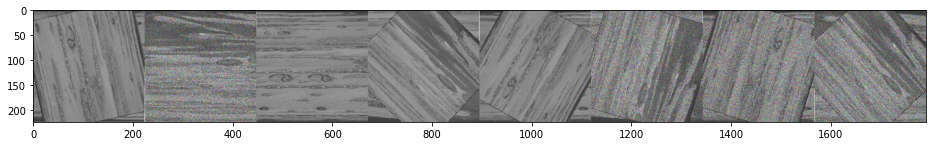

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# Densenet-201 Model

In [ ]:
import tensorflow as tf
model = tf.keras.applications.DenseNet201(include_top=True,weights="imagenet")

82534400/82524592 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
# make a reference to VGG's input layer
inp = model.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(model.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
from tensorflow.keras import optimizers

# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

opt = optimizers.SGD(learning_rate=20)
model_new.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=70, 
                         epochs=25, 
                         validation_data=(x_val, y_val))

Epoch 1/25
125/125 [==============================] - 79s 445ms/step - loss: 138.3404 - accuracy: 0.9140 - val_loss: 1.1760 - val_accuracy: 0.9936
Epoch 2/25
125/125 [==============================] - 50s 400ms/step - loss: 0.8347 - accuracy: 0.9960 - val_loss: 0.7412 - val_accuracy: 0.9946
Epoch 3/25
125/125 [==============================] - 51s 409ms/step - loss: 0.3646 - accuracy: 0.9970 - val_loss: 1.1718 - val_accuracy: 0.9920
Epoch 4/25
125/125 [==============================] - 51s 412ms/step - loss: 0.2826 - accuracy: 0.9979 - val_loss: 0.2602 - val_accuracy: 0.9989
Epoch 5/25
125/125 [==============================] - 51s 409ms/step - loss: 0.1837 - accuracy: 0.9989 - val_loss: 0.5002 - val_accuracy: 0.9957
Epoch 6/25
125/125 [==============================] - 51s 412ms/step - loss: 0.1845 - accuracy: 0.9990 - val_loss: 0.1572 - val_accuracy: 0.9984
Epoch 7/25
125/125 [==============================] - 51s 412ms/step - loss: 0.1600 - accuracy: 0.9985 - val_loss: 0.1156 - val_

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.1665058135986328
Test accuracy: 0.9989299178123474


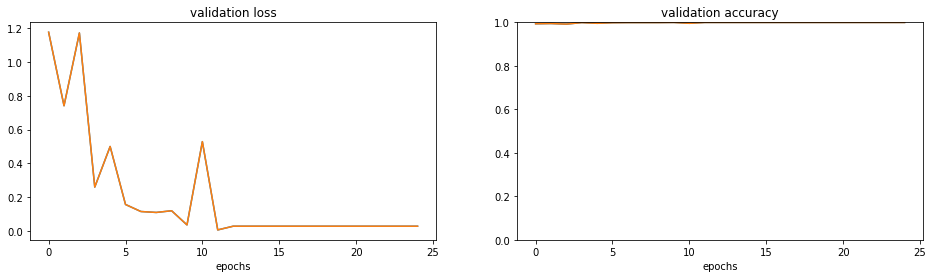

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history2.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history2.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
import sklearn.metrics
y_pred = model_new.predict(x_test)
y_pred = np.float32((y_pred>0.5))
y_test_single = y_test[:,0];
y_pred_single = y_pred[:,0];
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_single,y_pred_single)

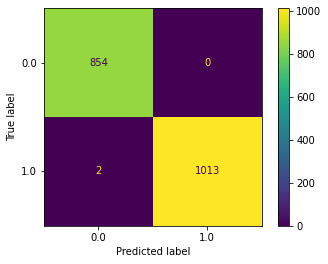

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
...    y_test_single, y_pred_single)


In [ ]:
model_new.save('DenseNet201_TF_Model.h5') 

In [ ]:
history2.history


{'loss': [138.34036254882812,
  0.8347141146659851,
  0.3645698130130768,
  0.2826191484928131,
  0.18374061584472656,
  0.18454892933368683,
  0.16001848876476288,
  0.07561436295509338,
  0.09331071376800537,
  0.044857025146484375,
  0.03529279679059982,
  0.04958411678671837,
  0.026544228196144104,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.9139612317085266,
  0.9959848523139954,
  0.9970173239707947,
  0.9979350566864014,
  0.9988527894020081,
  0.9989675283432007,
  0.998508632183075,
  0.9995411038398743,
  0.9990822672843933,
  0.9991969466209412,
  0.9995411038398743,
  0.9993116855621338,
  0.9997705817222595,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.1759607791900635,
  0.7411878705024719,
  1.171783685684204,
  0.2601630985736847,
  0.5001981258392334,
  0.15716080367565155,
  0.11558594554662704,
  0.11003082245588303,
  0.12006904184818268,
  0.03631184622